how to plot shape files with python and geopandas, source 101touchapps, https://www.youtube.com/watch?v=L28-l516kQo

In [1]:
import geopandas as gpd


In [2]:
##may_scooters = pd.read_pickle('../data/may.pkl')

In [3]:
zones = gpd.read_file('../data/MDHA_Promise_Zones/files/Export_Output_5.geojson')

In [4]:
type(zones)

geopandas.geodataframe.GeoDataFrame

In [5]:
zones.tail()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
1,2,2,7.670585e+07,45226.018917,"POLYGON ((-78.58438 41.14694, -78.58423 41.146..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((-78.50866 41.16535, -78.50852 41.165..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((-78.55109 41.12847, -78.55101 41.128..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((-78.59154 41.23154, -78.59113 41.230..."
5,6,6,9.535996e+07,59256.923574,"POLYGON ((-78.66358 41.16211, -78.66337 41.161..."


<AxesSubplot:>

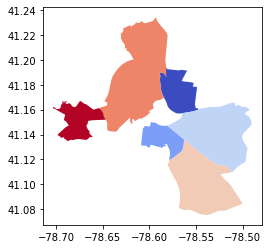

In [6]:
zones.plot(cmap = 'coolwarm')

In [7]:
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    6 non-null      int64   
 1   ZONE_ID     6 non-null      int64   
 2   SHAPE_STAr  6 non-null      float64 
 3   SHAPE_STLe  6 non-null      float64 
 4   geometry    6 non-null      geometry
dtypes: float64(2), geometry(1), int64(2)
memory usage: 368.0 bytes


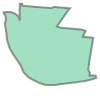

In [8]:
zones.loc[0, 'geometry']

In [9]:
print(zones.loc[0, 'geometry'])

POLYGON ((-78.56795146725433 41.19166750675308, -78.56794825107754 41.19166751038689, -78.56765886341009 41.19170279899572, -78.56750144531037 41.19179288943749, -78.56725514742996 41.19193503057951, -78.56706659104549 41.19200017822575, -78.56676340611817 41.19210741442149, -78.56646652605096 41.19214870458928, -78.566389360573 41.19216077791926, -78.56600221527393 41.19209326956241, -78.565676199297 41.19203668261809, -78.56558291594108 41.19202879281382, -78.56528483689537 41.19200514487513, -78.56507896775203 41.19198738872239, -78.5649352885746 41.19197555800243, -78.56458681323984 41.19194696950767, -78.56446243215376 41.19193511866686, -78.56442275974895 41.19193216508627, -78.56425763610899 41.19191835992014, -78.56417936071942 41.19191045366301, -78.5639466798805 41.1918877316848, -78.5638694779707 41.19188082350066, -78.56358212610351 41.19186015840852, -78.56350921694887 41.19185524362767, -78.56314788290119 41.19182966553546, -78.56279083948164 41.19180508283552, -78.562721

In [10]:
zones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
zones.geometry.centroid

C:\Users\jojuk\AppData\Local\Temp/ipykernel_14776/3668247504.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  zones.geometry.centroid


0    POINT (-78.56920 41.17446)
1    POINT (-78.58585 41.13666)
2    POINT (-78.52802 41.14093)
3    POINT (-78.54382 41.10091)
4    POINT (-78.61285 41.18771)
5    POINT (-78.67593 41.15125)
dtype: geometry

In [12]:
center = zones.geometry.centroid
print(center)

0    POINT (-78.56920 41.17446)
1    POINT (-78.58585 41.13666)
2    POINT (-78.52802 41.14093)
3    POINT (-78.54382 41.10091)
4    POINT (-78.61285 41.18771)
5    POINT (-78.67593 41.15125)
dtype: geometry


C:\Users\jojuk\AppData\Local\Temp/ipykernel_14776/2487087119.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = zones.geometry.centroid


In [13]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[0    41.174457
1    41.136658
2    41.140933
3    41.100905
4    41.187705
5    41.151252
dtype: float64, 0   -78.569196
1   -78.585846
2   -78.528021
3   -78.543821
4   -78.612851
5   -78.675926
dtype: float64]


In [15]:
import folium
map_zones = folium.Map(location=[41.136658, -78.585846], zoom_start = 12)


marker = folium.Marker(
        location = [41.136658, -78.585846]) 

    

#display our map
map_zones